In [1]:
import pandas as pd
import numpy as np

In [2]:
df_bikeShare = pd.read_csv('bikeshare-dataset-2020.csv')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,2,5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#how many rows (instances)? How many columns (variables)? Describe each of the variables
df_bikeShare.shape[0]

2911309

In [4]:
df_bikeShare.columns

Index(['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type'],
      dtype='object')

In [5]:
print (df_bikeShare.dtypes)

Trip Id                object
Trip  Duration        float64
Start Station Id       object
Start Time             object
Start Station Name     object
End Station Id         object
End Time               object
End Station Name       object
Bike Id                object
User Type              object
dtype: object


In [6]:
df_bikeShare.nunique()

Trip Id               2911309
Trip  Duration          19947
Start Station Id         1464
Start Time             395679
Start Station Name        679
End Station Id           1465
End Time               395545
End Station Name          700
Bike Id                 12802
User Type                   2
dtype: int64

In [7]:
#How many of the rows contain NA?
df_bikeShare.isnull().sum()

Trip Id                  0
Trip  Duration           1
Start Station Id         1
Start Time               1
Start Station Name     794
End Station Id        1302
End Time                 1
End Station Name      2050
Bike Id                 74
User Type              250
dtype: int64

In [8]:
#small percentage of rows with NA (3142/2911309 rows) - decided to drop all rows with NA
df_bikeShare.dropna(axis='rows', how='any', inplace=False)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,Bike Id,User Type
0,7334128,648.0,7003,01/01/2020 00:08,Madison Ave / Bloor St W,7271,01/01/2020 00:19,Yonge St / Alexander St - SMART,3104,Annual Member
1,7334129,419.0,7007,01/01/2020 00:10,College St / Huron St,7163,01/01/2020 00:17,Yonge St / Wood St,2126,Annual Member
2,7334130,566.0,7113,01/01/2020 00:13,Parliament St / Aberdeen Ave,7108,01/01/2020 00:22,Front St E / Cherry St,4425,Annual Member
3,7334131,1274.0,7333,01/01/2020 00:17,King St E / Victoria St,7311,01/01/2020 00:38,Sherbourne St / Isabella St,4233,Annual Member
4,7334132,906.0,7009,01/01/2020 00:19,King St E / Jarvis St,7004,01/01/2020 00:34,University Ave / Elm St,2341,Casual Member
...,...,...,...,...,...,...,...,...,...,...
2911303,10644213,330.0,7010,12/31/2020 23:52,King St W / Spadina Ave,7216,12/31/2020 23:57,Wellington St W / Stafford St,3458,Annual Member
2911304,10644214,216.0,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,4085,Annual Member
2911305,10644215,204.0,7288,12/31/2020 23:54,Humber Bay Shores Park West,7514,12/31/2020 23:58,Humber Bay Shores Park / Marine Parade Dr,3580,Annual Member
2911306,10644216,1659.0,7270,12/31/2020 23:56,Church St / Dundas St E - SMART,7270,01/01/2021 00:24,Church St / Dundas St E - SMART,5137,Annual Member


In [9]:
#drop columns not planning to use
df_bikeShare = df_bikeShare.drop(['Trip  Duration', 'End Station Name', 'Start Station Id', 'Trip Id', 'End Time', 'Bike Id', 'User Type', 'End Station Id'], axis = 1)

In [10]:
#looking to create models for the most popular start stations, group by start station name and find top 5 most common start station names
grouped = df_bikeShare.groupby(['Start Station Name']).size()
grouped.sort_values(ascending=False).head(5)

Start Station Name
Queens Quay E / Lower Sherbourne St    30977
Lake Shore Blvd W / Ontario Dr         30481
Marilyn Bell Park Tennis Court         26586
HTO Park (Queens Quay W)               26145
York St / Queens Quay W                25751
dtype: int64

In [11]:
#create a new data frame with only the top 5 stations from the 2020 the dataset
df1 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
df2 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
df3 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
df4 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
df5 = df_bikeShare.loc[df_bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [12]:
df_bikeShareTop5 = pd.concat([df1, df2, df3, df4, df5], axis=0)

In [13]:
df_bikeShareTop5.shape[0]

139940

In [14]:
df_bikeShareTop5

,Start Time,Start Station Name
245,01/01/2020 09:12,Queens Quay E / Lower Sherbourne St
246,01/01/2020 09:13,Queens Quay E / Lower Sherbourne St
376,01/01/2020 11:43,Queens Quay E / Lower Sherbourne St
393,01/01/2020 11:58,Queens Quay E / Lower Sherbourne St
408,01/01/2020 12:08,Queens Quay E / Lower Sherbourne St
...,...,...
2910563,12/31/2020 17:45,York St / Queens Quay W
2911073,12/31/2020 20:56,York St / Queens Quay W
2911193,12/31/2020 22:05,York St / Queens Quay W
2911220,12/31/2020 22:23,York St / Queens Quay W


In [15]:
#From Start Time column, pull out day, month, and time columns
df = pd.DataFrame(df_bikeShareTop5)

In [16]:
#convert data type (object) to date time 
from datetime import datetime
df['Start Time'] =  pd.to_datetime(df['Start Time'], errors='coerce', format="%m/%d/%Y %H:%M")

In [17]:
df['Start Day'] = df['Start Time'].dt.day
df['Start Month'] = df['Start Time'].dt.month

In [18]:
df['New Start time'] = df['Start Time'].dt.time

In [19]:
df

,Start Time,Start Station Name,Start Day,Start Month,New Start time
245,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,1,1,09:12:00
246,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,1,1,09:13:00
376,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,1,1,11:43:00
393,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,1,1,11:58:00
408,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,1,1,12:08:00
...,...,...,...,...,...
2910563,2020-12-31 17:45:00,York St / Queens Quay W,31,12,17:45:00
2911073,2020-12-31 20:56:00,York St / Queens Quay W,31,12,20:56:00
2911193,2020-12-31 22:05:00,York St / Queens Quay W,31,12,22:05:00
2911220,2020-12-31 22:23:00,York St / Queens Quay W,31,12,22:23:00


In [20]:
# Create the day of week variable
from datetime import datetime
import calendar

In [21]:
df['Date'] = pd.to_datetime(df['Start Time']).dt.date

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d").dt.strftime("%m/%d/%Y")

In [23]:
df['Date'] =  pd.to_datetime(df['Date'], format="%m/%d/%Y")

In [24]:
df['Day of Week'] = df['Date'].dt.dayofweek

In [25]:
print(df['Day of Week'])

245        2
246        2
376        2
393        2
408        2
          ..
2910563    3
2911073    3
2911193    3
2911220    3
2911221    3
Name: Day of Week, Length: 139940, dtype: int64


In [26]:
#add temperature and precipitation variables
weather = pd.read_csv('Toronto Weather 2020.csv')

In [27]:
weather.rename(columns={'Date/Time': 'Date'}, inplace=True)

In [28]:
weather

,Station Name,Date,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
0,TORONTO CITY,1/1/2020,2020,1,1,-0.1,0.2
1,TORONTO CITY,1/2/2020,2020,1,2,3.6,0.0
2,TORONTO CITY,1/3/2020,2020,1,3,5.7,0.0
3,TORONTO CITY,1/4/2020,2020,1,4,2.0,1.5
4,TORONTO CITY,1/5/2020,2020,1,5,0.3,5.6
...,...,...,...,...,...,...,...
361,TORONTO CITY,12/27/2020,2020,12,27,1.1,0.5
362,TORONTO CITY,12/28/2020,2020,12,28,1.7,3.4
363,TORONTO CITY,12/29/2020,2020,12,29,-2.3,0.0
364,TORONTO CITY,12/30/2020,2020,12,30,1.7,5.9


In [29]:
weather['Date'] =  pd.to_datetime(weather['Date'], format="%m/%d/%Y")

In [30]:
#add weather to main dataset
bikeShareWeather = pd.merge(df, weather, on = "Date")

In [31]:
bikeShareWeather

,Start Time,Start Station Name,Start Day,Start Month,New Start time,Date,Day of Week,Station Name,Year,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,1,1,09:12:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
1,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,1,1,09:13:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
2,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,1,1,11:43:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
3,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,1,1,11:58:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
4,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,1,1,12:08:00,2020-01-01,2,TORONTO CITY,2020,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
139935,2020-12-31 17:45:00,York St / Queens Quay W,31,12,17:45:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139936,2020-12-31 20:56:00,York St / Queens Quay W,31,12,20:56:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139937,2020-12-31 22:05:00,York St / Queens Quay W,31,12,22:05:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0
139938,2020-12-31 22:23:00,York St / Queens Quay W,31,12,22:23:00,2020-12-31,3,TORONTO CITY,2020,12,31,0.7,0.0


In [32]:
bikeShareWeather = bikeShareWeather.drop(['Start Month', 'Start Day', 'Station Name', 'Year'], axis = 1)

In [33]:
bikeShareWeather

,Start Time,Start Station Name,New Start time,Date,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,09:12:00,2020-01-01,2,1,1,-0.1,0.2
1,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,09:13:00,2020-01-01,2,1,1,-0.1,0.2
2,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,11:43:00,2020-01-01,2,1,1,-0.1,0.2
3,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,11:58:00,2020-01-01,2,1,1,-0.1,0.2
4,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,12:08:00,2020-01-01,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...
139935,2020-12-31 17:45:00,York St / Queens Quay W,17:45:00,2020-12-31,3,12,31,0.7,0.0
139936,2020-12-31 20:56:00,York St / Queens Quay W,20:56:00,2020-12-31,3,12,31,0.7,0.0
139937,2020-12-31 22:05:00,York St / Queens Quay W,22:05:00,2020-12-31,3,12,31,0.7,0.0
139938,2020-12-31 22:23:00,York St / Queens Quay W,22:23:00,2020-12-31,3,12,31,0.7,0.0


In [34]:
print(bikeShareWeather.dtypes)

Start Time            datetime64[ns]
Start Station Name            object
New Start time                object
Date                  datetime64[ns]
Day of Week                    int64
Month                          int64
Day                            int64
Mean Temp (°C)               float64
Total Precip (mm)            float64
dtype: object


In [35]:
bikeShareWeather['New Start time'] = bikeShareWeather['New Start time'].astype(str)

In [36]:
#convert start time to numeric
bikeShareWeather['New Start time'] = bikeShareWeather['New Start time'].replace(':', '', regex=True).astype(int)

In [37]:
#create morning, afternoon, evening and night classes for start time: Morning = 6:00am - 11:59am = 1; Afternoon = 12:00pm - 5:59pm = 2; evening = 6:00pm - 11:59am = 3; night = 12:00am - 5:59pm = 0
bins = [000000, 60000, 120000, 180000, 240000]
labels = [0, 1, 2, 3, 0]
bikeShareWeather['Time Labels'] = np.array(labels)[np.array(bins).searchsorted(bikeShareWeather['New Start time'])-1]  
bikeShareWeather

,Start Time,Start Station Name,New Start time,Date,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm),Time Labels
0,2020-01-01 09:12:00,Queens Quay E / Lower Sherbourne St,91200,2020-01-01,2,1,1,-0.1,0.2,1
1,2020-01-01 09:13:00,Queens Quay E / Lower Sherbourne St,91300,2020-01-01,2,1,1,-0.1,0.2,1
2,2020-01-01 11:43:00,Queens Quay E / Lower Sherbourne St,114300,2020-01-01,2,1,1,-0.1,0.2,1
3,2020-01-01 11:58:00,Queens Quay E / Lower Sherbourne St,115800,2020-01-01,2,1,1,-0.1,0.2,1
4,2020-01-01 12:08:00,Queens Quay E / Lower Sherbourne St,120800,2020-01-01,2,1,1,-0.1,0.2,2
...,...,...,...,...,...,...,...,...,...,...
139935,2020-12-31 17:45:00,York St / Queens Quay W,174500,2020-12-31,3,12,31,0.7,0.0,2
139936,2020-12-31 20:56:00,York St / Queens Quay W,205600,2020-12-31,3,12,31,0.7,0.0,3
139937,2020-12-31 22:05:00,York St / Queens Quay W,220500,2020-12-31,3,12,31,0.7,0.0,3
139938,2020-12-31 22:23:00,York St / Queens Quay W,222300,2020-12-31,3,12,31,0.7,0.0,3


In [38]:
#don't need old 'Start time' or 'New Start time' columns anymore - drop
df = bikeShareWeather.drop(['Start Time', 'New Start time'], axis = 1)

In [39]:
#group rides by date, time (morning, afternoon, evening, night) and Start Station and create a 'Ride Count' column
bikeShareCount = df.groupby(['Date', 'Time Labels', 'Start Station Name']).size().reset_index(name='Ride Count')

In [40]:
bikeShareCount

,Date,Time Labels,Start Station Name,Ride Count
0,2020-01-01,0,HTO Park (Queens Quay W),1
1,2020-01-01,1,HTO Park (Queens Quay W),2
2,2020-01-01,1,Lake Shore Blvd W / Ontario Dr,1
3,2020-01-01,1,Queens Quay E / Lower Sherbourne St,4
4,2020-01-01,1,York St / Queens Quay W,5
...,...,...,...,...
5724,2020-12-31,2,Marilyn Bell Park Tennis Court,9
5725,2020-12-31,2,Queens Quay E / Lower Sherbourne St,9
5726,2020-12-31,2,York St / Queens Quay W,6
5727,2020-12-31,3,Queens Quay E / Lower Sherbourne St,1


In [41]:
bikeShareNew = pd.merge(bikeShareCount, bikeShareWeather, how = 'left', on = ['Date', 'Time Labels', 'Start Station Name'])

In [42]:
bikeShareNew

,Date,Time Labels,Start Station Name,Ride Count,Start Time,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,2020-01-01,0,HTO Park (Queens Quay W),1,2020-01-01 01:08:00,10800,2,1,1,-0.1,0.2
1,2020-01-01,1,HTO Park (Queens Quay W),2,2020-01-01 08:26:00,82600,2,1,1,-0.1,0.2
2,2020-01-01,1,HTO Park (Queens Quay W),2,2020-01-01 08:26:00,82600,2,1,1,-0.1,0.2
3,2020-01-01,1,Lake Shore Blvd W / Ontario Dr,1,2020-01-01 10:36:00,103600,2,1,1,-0.1,0.2
4,2020-01-01,1,Queens Quay E / Lower Sherbourne St,4,2020-01-01 09:12:00,91200,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...
139935,2020-12-31,3,Queens Quay E / Lower Sherbourne St,1,2020-12-31 19:50:00,195000,3,12,31,0.7,0.0
139936,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 20:56:00,205600,3,12,31,0.7,0.0
139937,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 22:05:00,220500,3,12,31,0.7,0.0
139938,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 22:23:00,222300,3,12,31,0.7,0.0


In [43]:
bikeShareWeather = bikeShareWeather.drop(['Start Time', 'New Start time'], axis = 1)

In [44]:
bikeShareNew.to_csv('bikeshare2020clean.csv')

In [45]:
bikeShare = pd.read_csv('bikeshare2020clean.csv')

In [46]:
#Exploratory data analysis - begin by visualizing the different variables
import matplotlib.pyplot as plt
import seaborn as sns

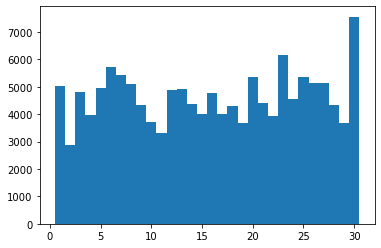

In [47]:
x = bikeShare['Day']
plt.hist(x, bins = 30, align = 'left')
plt.show()

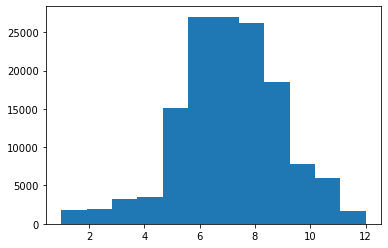

In [48]:
x = bikeShare['Month']
plt.hist(x, bins = 12)
plt.show()
#most popular months for rides are May - September

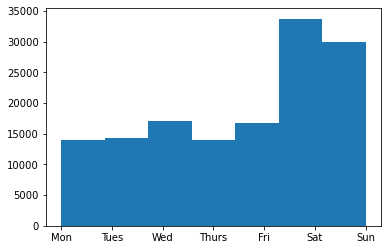

In [49]:
x = bikeShare['Day of Week']
plt.hist(x, bins = 7)
positions = (0, 1, 2, 3, 4, 5, 6)
labels = ("Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun") 
plt.xticks(positions, labels)
plt.show()
#most popular days of the week for rides are Saturday and Sunday

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


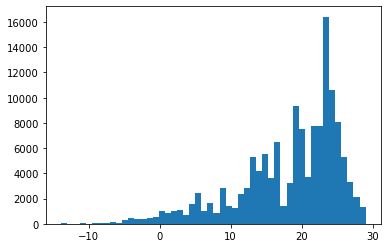

In [50]:
x = bikeShare['Mean Temp (°C)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#most popular temperatures for rides are 24-25 degrees Celsius)

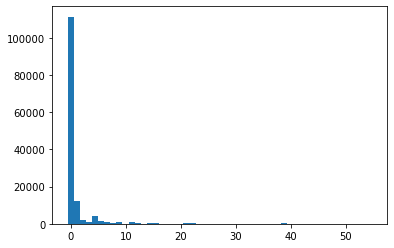

In [51]:
x = bikeShare['Total Precip (mm)']
plt.hist(x, bins = 50, align = 'left')
plt.show()
#as expected, most rides are taken on days when there is 0mm of precipitation that day

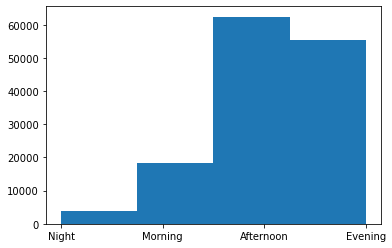

In [52]:
x = bikeShare['Time Labels']
plt.hist(x, bins = 4)
positions = (0, 1, 2, 3)
labels = ("Night", "Morning", "Afternoon", "Evening") 
plt.xticks(positions, labels)
plt.show()
#most rides are taken in the afternoon and evening

In [53]:
bikeShare.isnull().sum()

Unnamed: 0               0
Date                     0
Time Labels              0
Start Station Name       0
Ride Count               0
Start Time               0
New Start time           0
Day of Week              0
Month                    0
Day                      0
Mean Temp (°C)        1014
Total Precip (mm)     1014
dtype: int64

In [54]:
bikeShare.dropna(axis='rows', how='any', inplace=True)

In [100]:
bikeShare.to_csv('bikeshare2020model.csv')

In [101]:
bikeShare

,Unnamed: 0,Date,Time Labels,Start Station Name,Ride Count,Start Time,New Start time,Day of Week,Month,Day,Mean Temp (°C),Total Precip (mm)
0,0,2020-01-01,0,HTO Park (Queens Quay W),1,2020-01-01 01:08:00,10800,2,1,1,-0.1,0.2
1,1,2020-01-01,1,HTO Park (Queens Quay W),2,2020-01-01 08:26:00,82600,2,1,1,-0.1,0.2
2,2,2020-01-01,1,HTO Park (Queens Quay W),2,2020-01-01 08:26:00,82600,2,1,1,-0.1,0.2
3,3,2020-01-01,1,Lake Shore Blvd W / Ontario Dr,1,2020-01-01 10:36:00,103600,2,1,1,-0.1,0.2
4,4,2020-01-01,1,Queens Quay E / Lower Sherbourne St,4,2020-01-01 09:12:00,91200,2,1,1,-0.1,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
139935,139935,2020-12-31,3,Queens Quay E / Lower Sherbourne St,1,2020-12-31 19:50:00,195000,3,12,31,0.7,0.0
139936,139936,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 20:56:00,205600,3,12,31,0.7,0.0
139937,139937,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 22:05:00,220500,3,12,31,0.7,0.0
139938,139938,2020-12-31,3,York St / Queens Quay W,4,2020-12-31 22:23:00,222300,3,12,31,0.7,0.0


In [57]:
#Model 1: Linear Regression
#Initial model 
from sklearn.linear_model import LinearRegression

In [58]:
#splitting out dataset by start station names to create models for each start station (creating one model for each start station)
df1 = bikeShare.loc[bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
df2 = bikeShare.loc[bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
df3 = bikeShare.loc[bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
df4 = bikeShare.loc[bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
df5 = bikeShare.loc[bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [59]:
#set features and targets 
X1 = df1[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X2 = df2[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X3 = df3[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X4 = df4[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X5 = df5[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]

In [60]:
y1 = df1['Ride Count']
y2 = df2['Ride Count']
y3 = df3['Ride Count']
y4 = df4['Ride Count']
y5 = df5['Ride Count']

In [61]:
#split the data into train and test sets
from sklearn.model_selection import train_test_split

In [62]:
training_features1, testing_features1, training_labels1, testing_labels1 = train_test_split(X1, y1, test_size = 0.25, random_state = 42)
training_features2, testing_features2, training_labels2, testing_labels2 = train_test_split(X2, y2, test_size = 0.25, random_state = 42)
training_features3, testing_features3, training_labels3, testing_labels3 = train_test_split(X3, y3, test_size = 0.25, random_state = 42)
training_features4, testing_features4, training_labels4, testing_labels4 = train_test_split(X4, y4, test_size = 0.25, random_state = 42)
training_features5, testing_features5, training_labels5, testing_labels5 = train_test_split(X5, y5, test_size = 0.25, random_state = 42)

In [63]:
#train models
reg1 = LinearRegression().fit(training_features1, training_labels1)
reg2 = LinearRegression().fit(training_features2, training_labels2)
reg3 = LinearRegression().fit(training_features3, training_labels3)
reg4 = LinearRegression().fit(training_features4, training_labels4)
reg5 = LinearRegression().fit(training_features5, training_labels5)

In [64]:
#printing the intercepts for each model
print(reg1.intercept_)
print(reg2.intercept_)
print(reg3.intercept_)
print(reg4.intercept_)
print(reg5.intercept_)

-24.87259404867585
-51.57652781963037
-27.107397571313413
-32.38906385780844
-33.002229316853516


In [65]:
#printing the coefficients for each model
coeff_df1 = pd.DataFrame(reg1.coef_, X1.columns, columns=['Coefficient'])
coeff_df1

,Coefficient
Time Labels,14.755074
Day of Week,11.734388
Month,-2.854716
Day,-0.212271
Mean Temp (°C),2.772070
Total Precip (mm),-1.668177


In [66]:
coeff_df2 = pd.DataFrame(reg2.coef_, X2.columns, columns=['Coefficient'])
coeff_df2

,Coefficient
Time Labels,27.928774
Day of Week,18.421746
Month,-3.791319
Day,-0.676265
Mean Temp (°C),3.351786
Total Precip (mm),-3.987278


In [67]:
coeff_df3 = pd.DataFrame(reg1.coef_, X3.columns, columns=['Coefficient'])
coeff_df3

,Coefficient
Time Labels,14.755074
Day of Week,11.734388
Month,-2.854716
Day,-0.212271
Mean Temp (°C),2.772070
Total Precip (mm),-1.668177


In [68]:
coeff_df4 = pd.DataFrame(reg1.coef_, X4.columns, columns=['Coefficient'])
coeff_df4

,Coefficient
Time Labels,14.755074
Day of Week,11.734388
Month,-2.854716
Day,-0.212271
Mean Temp (°C),2.772070
Total Precip (mm),-1.668177


In [69]:
coeff_df5 = pd.DataFrame(reg1.coef_, X5.columns, columns=['Coefficient'])
coeff_df5

,Coefficient
Time Labels,14.755074
Day of Week,11.734388
Month,-2.854716
Day,-0.212271
Mean Temp (°C),2.772070
Total Precip (mm),-1.668177


In [70]:
#use the models to make predictions
y_pred1 = reg1.predict(testing_features1)
y_pred2 = reg2.predict(testing_features2)
y_pred3 = reg3.predict(testing_features3)
y_pred4 = reg4.predict(testing_features4)
y_pred5 = reg5.predict(testing_features5)

In [71]:
df1 = pd.DataFrame({'Actual': testing_labels1, 'Predicted': y_pred1})
df1

,Actual,Predicted
115368,28,25.970776
90495,85,94.790129
14586,213,80.229087
13497,8,11.002718
90844,103,109.545203
...,...,...
120518,17,59.542540
16402,50,65.312609
85863,156,114.732526
98415,114,120.690248


In [72]:
#evaluate the models
from sklearn import metrics

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels1, y_pred1)))
print('r2: ', round(metrics.r2_score(testing_labels1, y_pred1),4))

Mean Absolute Error: 33.98232139335458
Mean Squared Error: 2034.709858435298
Root Mean Squared Error: 45.107758295389694
r2:  0.3828


In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels2, y_pred2)))
print('r2: ', round(metrics.r2_score(testing_labels2, y_pred2),4))

Mean Absolute Error: 49.02923590065008
Mean Squared Error: 3783.717475736279
Root Mean Squared Error: 61.51192954001914
r2:  0.378


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels3, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels3, y_pred3)))
print('r2: ', round(metrics.r2_score(testing_labels3, y_pred3),4))

Mean Absolute Error: 40.52813279394602
Mean Squared Error: 2837.515736968393
Root Mean Squared Error: 53.268337095955914
r2:  0.3151


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels4, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels4, y_pred4)))
print('r2: ', round(metrics.r2_score(testing_labels4, y_pred4),4))

Mean Absolute Error: 27.931371310688593
Mean Squared Error: 1386.7313088710084
Root Mean Squared Error: 37.23884140076069
r2:  0.4222


In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels5, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels5, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels5, y_pred5)))
print('r2: ', round(metrics.r2_score(testing_labels5, y_pred5),4))

Mean Absolute Error: 22.279813257193272
Mean Squared Error: 815.9891275655035
Root Mean Squared Error: 28.565523407868856
r2:  0.4606


In [78]:
#Step-wise linear regression 
import statsmodels.api as sm

In [79]:
df1 = bikeShare.loc[bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']

In [80]:
Y = df1['Ride Count']
X = df1[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#all P>|t| values are less than 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ride Count   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     3297.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:            -1.6025e+05
No. Observations:               30723   AIC:                         3.205e+05
Df Residuals:                   30716   BIC:                         3.206e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.5323      1.295    -18.940      0.000     -27.071     -21.994
Time Labels          14.7002      0.341     43.061      0.000      14.031      15.369
Day of Week          11.7814      0.129     91.221      0.000      11.528      12.035
Month                -2.9274      0.117    -25.094      0.000      -3.156      -2.699
Day                  -0.2124      0.029     -7.303      0.000      -0.269      -0.155
Mean Temp (°C)        2.7800      0.033     83.715      0.000       2.715       2.845
Total Precip (mm)    -1.6340      0.072    -22.591      0.000      -1.776      -1.492
==============================================================================
Omnibus:                     4542.129   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7501.723
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       4.358   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
Y = df2['Ride Count']
X = df2[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#all P>|t| values are less than 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ride Count   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     3081.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:            -1.6805e+05
No. Observations:               30310   AIC:                         3.361e+05
Df Residuals:                   30303   BIC:                         3.362e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -51.7066      2.416    -21.403      0.000     -56.442     -46.971
Time Labels          28.1583      0.495     56.886      0.000      27.188      29.129
Day of Week          18.3757      0.179    102.581      0.000      18.025      18.727
Month                -3.7784      0.194    -19.457      0.000      -4.159      -3.398
Day                  -0.6811      0.042    -16.331      0.000      -0.763      -0.599
Mean Temp (°C)        3.3394      0.057     58.831      0.000       3.228       3.451
Total Precip (mm)    -3.9685      0.122    -32.624      0.000      -4.207      -3.730
==============================================================================
Omnibus:                     2605.481   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3353.422
Skew:                           0.767   Prob(JB):                         0.00
Kurtosis:                       3.549   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
Y = df3['Ride Count']
X = df3[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#all P>|t| values are less than 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ride Count   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     1992.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:            -1.4232e+05
No. Observations:               26408   AIC:                         2.847e+05
Df Residuals:                   26401   BIC:                         2.847e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -27.4201      2.174    -12.614      0.000     -31.681     -23.159
Time Labels          17.6072      0.443     39.722      0.000      16.738      18.476
Day of Week          14.5653      0.165     88.222      0.000      14.242      14.889
Month                -3.4608      0.179    -19.349      0.000      -3.811      -3.110
Day                  -0.2577      0.037     -6.902      0.000      -0.331      -0.184
Mean Temp (°C)        2.4673      0.051     47.914      0.000       2.366       2.568
Total Precip (mm)    -1.3657      0.095    -14.384      0.000      -1.552      -1.180
==============================================================================
Omnibus:                     3634.399   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5414.147
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       3.890   Cond. No.                         184.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
Y = df4['Ride Count']
X = df4[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#all P>|t| values are less than 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ride Count   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     3188.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:            -1.3059e+05
No. Observations:               25937   AIC:                         2.612e+05
Df Residuals:                   25930   BIC:                         2.613e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -31.4108      1.445    -21.736      0.000     -34.243     -28.578
Time Labels          22.3542      0.292     76.568      0.000      21.782      22.926
Day of Week           9.6114      0.116     82.688      0.000       9.384       9.839
Month                -3.0999      0.123    -25.101      0.000      -3.342      -2.858
Day                  -0.3396      0.026    -12.904      0.000      -0.391      -0.288
Mean Temp (°C)        2.4490      0.035     70.494      0.000       2.381       2.517
Total Precip (mm)    -1.4186      0.062    -23.011      0.000      -1.539      -1.298
==============================================================================
Omnibus:                     4979.496   Durbin-Watson:                   0.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11900.753
Skew:                           1.080   Prob(JB):                         0.00
Kurtosis:                       5.519   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
Y = df5['Ride Count']
X = df5[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.summary()
#all P>|t| values are less than 0.01

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Ride Count   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     3728.
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        23:44:25   Log-Likelihood:            -1.2200e+05
No. Observations:               25548   AIC:                         2.440e+05
Df Residuals:                   25541   BIC:                         2.441e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -32.5406      0.926    -35.134      0.000     -34.356     -30.725
Time Labels          15.9120      0.226     70.445      0.000      15.469      16.355
Day of Week           7.5371      0.091     82.944      0.000       7.359       7.715
Month                -0.7766      0.080     -9.655      0.000      -0.934      -0.619
Day                  -0.0567      0.020     -2.792      0.005      -0.097      -0.017
Mean Temp (°C)        1.9602      0.023     84.017      0.000       1.914       2.006
Total Precip (mm)    -1.5554      0.053    -29.457      0.000      -1.659      -1.452
==============================================================================
Omnibus:                     2572.309   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3447.172
Skew:                           0.843   Prob(JB):                         0.00
Kurtosis:                       3.628   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
#Model #2: Decision tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [107]:
bikeShare = pd.read_csv('bikeshare2020model.csv')

In [108]:
regressor = DecisionTreeRegressor(random_state = 0)

In [109]:
#splitting out dataset by start station names to create models for each start station
dtdf1 = bikeShare.loc[bikeShare['Start Station Name'] == 'Queens Quay E / Lower Sherbourne St']
dtdf2 = bikeShare.loc[bikeShare['Start Station Name'] == 'Lake Shore Blvd W / Ontario Dr']
dtdf3 = bikeShare.loc[bikeShare['Start Station Name'] == 'Marilyn Bell Park Tennis Court']
dtdf4 = bikeShare.loc[bikeShare['Start Station Name'] == 'HTO Park (Queens Quay W)']
dtdf5 = bikeShare.loc[bikeShare['Start Station Name'] == 'York St / Queens Quay W']

In [110]:
#set X and Y
dtX1 = dtdf1[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX2 = dtdf2[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX3 = dtdf3[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX4 = dtdf4[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]
dtX5 = dtdf5[['Time Labels', 'Day of Week', 'Month', 'Day', 'Mean Temp (°C)', 'Total Precip (mm)']]

In [111]:
dty1 = dtdf1['Ride Count']
dty2 = dtdf2['Ride Count']
dty3 = dtdf3['Ride Count']
dty4 = dtdf4['Ride Count']
dty5 = dtdf5['Ride Count']

In [112]:
#split into training and testing
from sklearn.model_selection import train_test_split

In [113]:
training_features1, testing_features1, training_labels1, testing_labels1 = train_test_split(dtX1, dty1, test_size = 0.25, random_state = 42)
training_features2, testing_features2, training_labels2, testing_labels2 = train_test_split(dtX2, dty2, test_size = 0.25, random_state = 42)
training_features3, testing_features3, training_labels3, testing_labels3 = train_test_split(dtX3, dty3, test_size = 0.25, random_state = 42)
training_features4, testing_features4, training_labels4, testing_labels4 = train_test_split(dtX4, dty4, test_size = 0.25, random_state = 42)
training_features5, testing_features5, training_labels5, testing_labels5 = train_test_split(dtX5, dty5, test_size = 0.25, random_state = 42)

In [114]:
#use the models to make predictions
y_pred1 = dtreg1.predict(testing_features1)
y_pred2 = dtreg2.predict(testing_features2)
y_pred3 = dtreg3.predict(testing_features3)
y_pred4 = dtreg4.predict(testing_features4)
y_pred5 = dtreg5.predict(testing_features5)

NameError: name 'dtreg1' is not defined

In [115]:
#evaluate the models
from sklearn import metrics

In [116]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels1, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels1, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels1, y_pred1)))
print('r2: ', round(metrics.r2_score(testing_labels1, y_pred1),4))

Mean Absolute Error: 33.98232139335458
Mean Squared Error: 2034.709858435298
Root Mean Squared Error: 45.107758295389694
r2:  0.3828


In [117]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels2, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels2, y_pred2)))
print('r2: ', round(metrics.r2_score(testing_labels2, y_pred2),4))

Mean Absolute Error: 49.02923590065008
Mean Squared Error: 3783.717475736279
Root Mean Squared Error: 61.51192954001914
r2:  0.378


In [118]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels3, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels3, y_pred3)))
print('r2: ', round(metrics.r2_score(testing_labels3, y_pred3),4))

Mean Absolute Error: 40.52813279394602
Mean Squared Error: 2837.515736968393
Root Mean Squared Error: 53.268337095955914
r2:  0.3151


In [120]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels4, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels4, y_pred4)))
print('r2: ', round(metrics.r2_score(testing_labels4, y_pred4),4))

Mean Absolute Error: 27.931371310688593
Mean Squared Error: 1386.7313088710084
Root Mean Squared Error: 37.23884140076069
r2:  0.4222


In [119]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels5, y_pred5))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels5, y_pred5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels5, y_pred5)))
print('r2: ', round(metrics.r2_score(testing_labels5, y_pred5),4))

Mean Absolute Error: 22.279813257193272
Mean Squared Error: 815.9891275655035
Root Mean Squared Error: 28.565523407868856
r2:  0.4606


In [ ]:
# feature importance for decision tree 
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

In [ ]:
#get and plot feature importance
importance = dtreg1.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()
#Time Labels, Day of Week, Mean Temp (°C) are the most important to the model 

In [ ]:
#try new models with just these important features
#set X and Y
dtX1a = dtdf1[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX2a = dtdf2[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX3a = dtdf3[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX4a = dtdf4[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]
dtX5a = dtdf5[['Time Labels', 'Day of Week', 'Mean Temp (°C)']]

In [ ]:
dty1a = dtdf1['Ride Count']
dty2a = dtdf2['Ride Count']
dty3a = dtdf3['Ride Count']
dty4a = dtdf4['Ride Count']
dty5a = dtdf5['Ride Count']

In [ ]:
training_features1a, testing_features1a, training_labels1a, testing_labels1a = train_test_split(dtX1a, dty1a, test_size = 0.25, random_state = 42)
training_features2a, testing_features2a, training_labels2a, testing_labels2a = train_test_split(dtX2a, dty2a, test_size = 0.25, random_state = 42)
training_features3a, testing_features3a, training_labels3a, testing_labels3a = train_test_split(dtX3a, dty3a, test_size = 0.25, random_state = 42)
training_features4a, testing_features4a, training_labels4a, testing_labels4a = train_test_split(dtX4a, dty4a, test_size = 0.25, random_state = 42)
training_features5a, testing_features5a, training_labels5a, testing_labels5a = train_test_split(dtX5a, dty5a, test_size = 0.25, random_state = 42)

In [ ]:
#train models
dtreg1a = regressor.fit(training_features1a, training_labels1a)
dtreg2a = regressor.fit(training_features2a, training_labels2a)
dtreg3a = regressor.fit(training_features3a, training_labels3a)
dtreg4a = regressor.fit(training_features4a, training_labels4a)
dtreg5a = regressor.fit(training_features5a, training_labels5a)

In [ ]:
#use the models to make predictions
y_pred1a = dtreg1a.predict(testing_features1a)
y_pred2a = dtreg2a.predict(testing_features2a)
y_pred3a = dtreg3a.predict(testing_features3a)
y_pred4a = dtreg4a.predict(testing_features4a)
y_pred5a = dtreg5a.predict(testing_features5a)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels1a, y_pred1a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels1a, y_pred1a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels1a, y_pred1a)))
print('r2: ', round(metrics.r2_score(testing_labels1a, y_pred1a),4))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels2a, y_pred2a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels2a, y_pred2a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels2a, y_pred2a)))
print('r2: ', round(metrics.r2_score(testing_labels2a, y_pred2a),4))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels3a, y_pred3a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels3a, y_pred3a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels3a, y_pred3a)))
print('r2: ', round(metrics.r2_score(testing_labels3a, y_pred3a),4))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels4a, y_pred4a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels4a, y_pred4a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels4a, y_pred4a)))
print('r2: ', round(metrics.r2_score(testing_labels4a, y_pred4a),4))

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(testing_labels5a, y_pred5a))
print('Mean Squared Error:', metrics.mean_squared_error(testing_labels5a, y_pred5a))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(testing_labels5a, y_pred5a)))
print('r2: ', round(metrics.r2_score(testing_labels5a, y_pred5a),4))